In our 'reduce_explore.py' we've tried a number of models and a number of different training durations for each. In this notebook we'll explore if any of them are any good.

In [1]:
import os
import pickle

x_test = pickle.load(open("models/reduced_x_test.pkl","rb"))
y_test = pickle.load(open("models/reduced_y_test.pkl","rb"))

models = dict()
for dirname, _, filenames in os.walk("models/"):
        for filename in filenames:

            if not "_" in filename and "reduced" in filename:
                thisFile = os.path.join(dirname, filename)
                thisModel = pickle.load(open(thisFile,"rb"))
                models[filename] = thisModel



Let's look at lbfgs first:

In [2]:
from sklearn.neural_network import MLPRegressor
solver_name = "lbfgs"

errors = dict()
for iter in range(1,29):
    strName = f"reduced - {solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)


{1: -0.05802010683606018, 2: -0.05802010683606018, 3: -0.05802010683606018, 4: -0.05802010683606018, 5: -0.05802010683606018, 6: -0.05802010683606018, 7: -0.05802010683606018, 8: -0.05802010683606018, 9: -0.05802010683606018, 10: -0.05802010683606018, 11: -0.05802010683606018, 12: -0.05802010683606018, 13: -0.05802010683606018, 14: -0.05802010683606018, 15: -0.05802010683606018, 16: -0.05802010683606018, 17: -0.05802010683606018, 18: -0.05802010683606018, 19: -0.05802010683606018, 20: -0.05802010683606018, 21: -0.05802010683606018, 22: -0.05802010683606018, 23: -0.05802010683606018, 24: -0.05802010683606018, 25: -0.05802010683606018, 26: -0.05802010683606018, 27: -0.05802010683606018, 28: -0.05802010683606018}


OK, so the predictions are terrible, and the model converged almost immediately. Can we visualise some predictions?

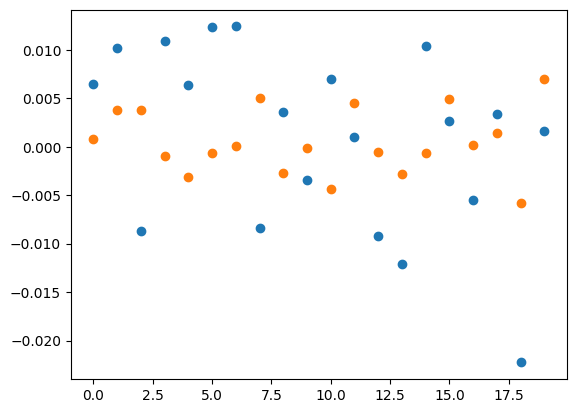

In [5]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["reduced - lbfgs - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Bad, let's look at sgd:

In [6]:
from sklearn.neural_network import MLPRegressor
solver_name = "sgd"

errors = dict()
for iter in range(1,29):
    strName = f"reduced - {solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)

{1: -0.2955655481836712, 2: -0.08120351398917913, 3: -0.08120351398917913, 4: -0.08120351398917913, 5: -0.08120351398917913, 6: -0.08120351398917913, 7: -0.08120351398917913, 8: -0.08120351398917913, 9: -0.08120351398917913, 10: -0.08120351398917913, 11: -0.08120351398917913, 12: -0.08120351398917913, 13: -0.08120351398917913, 14: -0.08120351398917913, 15: -0.08120351398917913, 16: -0.08120351398917913, 17: -0.08120351398917913, 18: -0.08120351398917913}


Still very bad, converged slower to the wrong answer - but still.

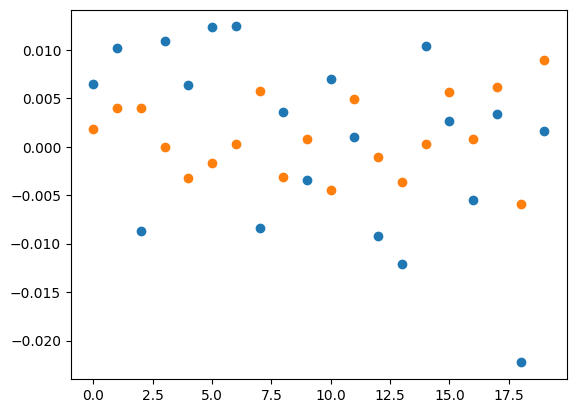

In [7]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["reduced - sgd - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Terrible. Adam said it had converged. Onto what I wonder:

In [8]:
from sklearn.neural_network import MLPRegressor
solver_name = "adam"

errors = dict()
for iter in range(1,19):
    strName = f"reduced - {solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)

{1: -3.443878125047637, 2: -3.4139701640562023, 3: -3.4139701640562023, 4: -3.4139701640562023, 5: -3.4139701640562023, 6: -3.4139701640562023, 7: -3.4139701640562023, 8: -3.4139701640562023, 9: -3.4139701640562023, 10: -3.4139701640562023, 11: -3.4139701640562023, 12: -3.4139701640562023, 13: -3.4139701640562023, 14: -3.4139701640562023, 15: -3.4139701640562023, 16: -3.4139701640562023, 17: -3.4139701640562023, 18: -3.4139701640562023}


Absolute garbage.

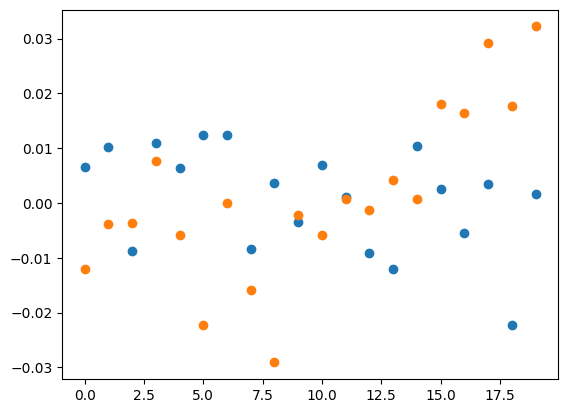

In [9]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["reduced - adam - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

After all that it looks like we can abandon Adam, and that lbfgs gets to a completely wrong correlation a bit quicker than the alternatives. 